In [1]:
from perovskite_ordering_descriptors_utils import *

In [2]:
perovskite_ordering_data = pd.read_json('../data/perovskite_ordering_data.json')
perovskite_ordering_data['y_true'] = np.where(perovskite_ordering_data['exp_ordering_type'] == 'rs', 1, 0)
print('Number of compositions:', len(perovskite_ordering_data.index.values))

Number of compositions: 190


In [3]:
perovskite_ordering_data.columns

Index(['formula', 'exp_ordering_type', 'exp_ordering_parameter', 'A', 'B',
       'A_electronegativity', 'A_ox_state', 'A_ionic_radius',
       'B_electronegativity', 'B_ox_state', 'B_ionic_radius',
       'ordering_prototype', 'unrelaxed_struct', 'm3gnet_opt_struct',
       'm3gnet_energy', 'm3gnet_energy_per_atom', 'm3gnet_rocksalt_prob',
       'm3gnet_normalized_conf_entropy', 'm3gnet_rocksalt_layered_diff',
       'dft_opt_struct', 'dft_energy', 'dft_energy_per_atom',
       'dft_rocksalt_prob', 'dft_normalized_conf_entropy',
       'dft_rocksalt_layered_diff', 'dft_e_hull', 'dft_bandgap',
       'dft_O_p_band_center', 'y_true'],
      dtype='object')

# Fig. 1

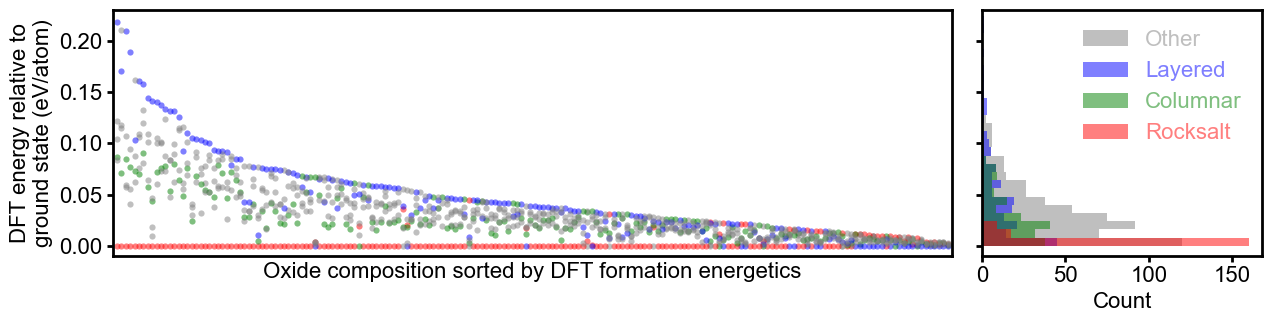

In [4]:
fig, axs = plt.subplot_mosaic(
    [['waterfall', 'distribution']],
    figsize=(13, 3.5), gridspec_kw={'width_ratios': [3, 1]}
)

plot_formation_energetics(perovskite_ordering_data, 'dft', axs['waterfall'], axs['distribution'])
plt.tight_layout()
plt.savefig('../figures/dft_formation_energetics.pdf', bbox_inches='tight')

# Fig. 2

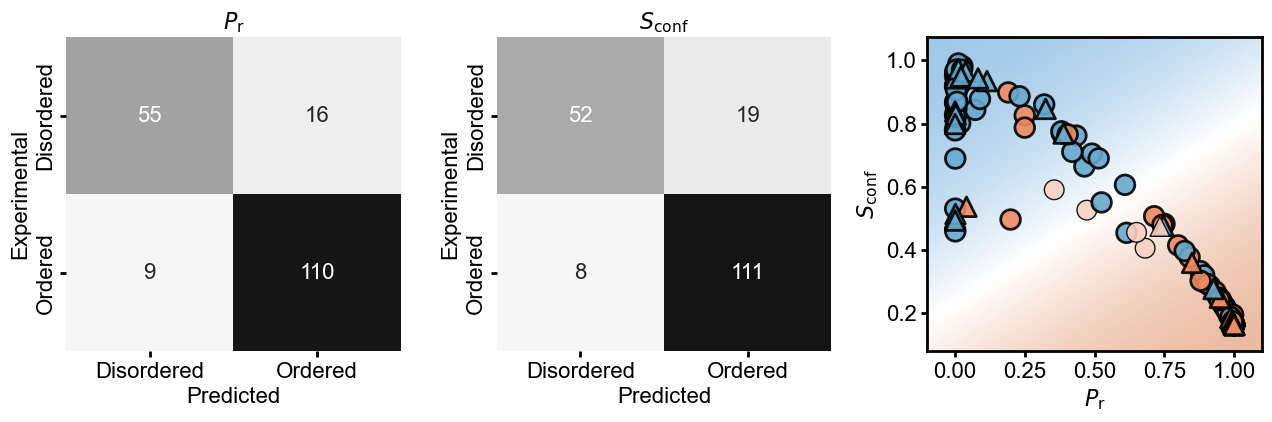

In [5]:
fig, axs = plt.subplot_mosaic(
    [['confusion_matrix_P', 'confusion_matrix_S', 'decision_boundary']],
    figsize=(13, 4.5)
)

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_P'], perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), '$P_{\mathrm{r}}$')
plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_S'], perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy(), '$S_{\mathrm{conf}}$')

plot_decision_boundary(
    perovskite_ordering_data, axs['decision_boundary'], 
    np.concatenate([
        perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
        perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy()
    ], axis=1),
    ['$P_{\mathrm{r}}$', '$S_{\mathrm{conf}}$']
)

plt.tight_layout()
plt.savefig('../figures/dft_confusion_matrix_decision_boundary.pdf', bbox_inches='tight')

# Fig. 3

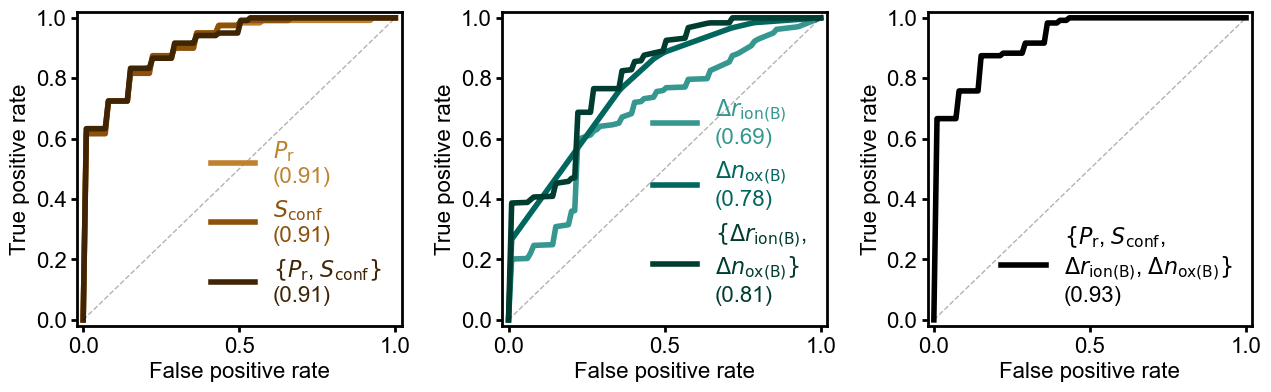

In [6]:
fig, axs = plt.subplot_mosaic(
    [['dft', 'atomic', 'dft_atomic']],
    figsize=(13, 4.2)
)

plot_roc_curve(
    perovskite_ordering_data, axs['dft'], 
    [
        perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
        perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy(), 
        np.concatenate([
            perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
            perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy()
        ], axis=1)
    ],
    labels = ['$P_{\mathrm{r}}$', '$S_{\mathrm{conf}}$', '$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}\}$'],
    colors = ['#bf812d', '#8c510a', '#402505']
)

plot_roc_curve(
    perovskite_ordering_data, axs['atomic'], 
    [
        perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), 
        perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1),
        np.concatenate([
            perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), 
            perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
        ], axis=1)
    ],
    labels = ['$\Delta r_{\mathrm{ion(B)}}$', '$\Delta n_{\mathrm{ox(B)}}$', '$\{\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$'],
    colors = ['#35978f', '#01665e', '#003c30']
)

plot_roc_curve(
    perovskite_ordering_data, axs['dft_atomic'], 
    [
        np.concatenate([
            perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
            perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy(),
            perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), 
            perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
        ], axis=1)
    ],
    labels = ['$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}$,\n$\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$'],
    colors = ['#000000']
)

plt.tight_layout()
plt.savefig('../figures/dft_roc_auc.pdf', bbox_inches='tight')

# Fig. 4

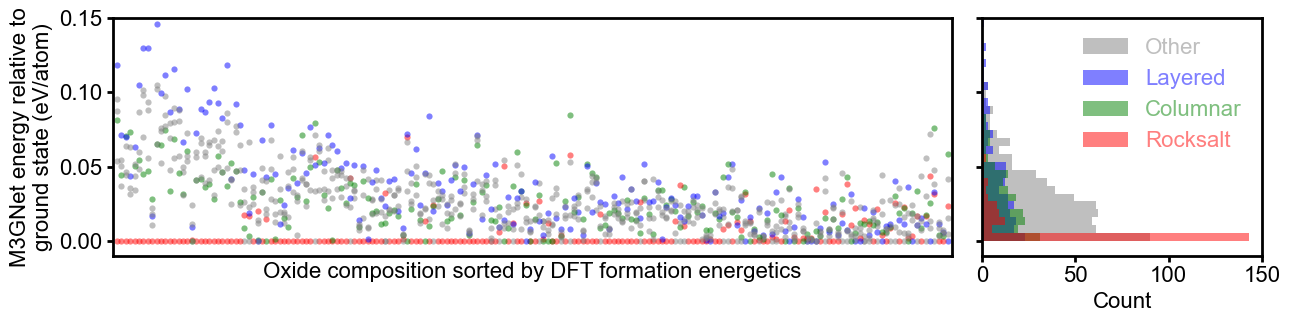

In [7]:
fig, axs = plt.subplot_mosaic(
    [['waterfall', 'distribution']],
    figsize=(13, 3.5), gridspec_kw={'width_ratios': [3, 1]}
)

plot_formation_energetics(perovskite_ordering_data, 'm3gnet', axs['waterfall'], axs['distribution'])
plt.tight_layout()
plt.savefig('../figures/m3gnet_formation_energetics.pdf', bbox_inches='tight')

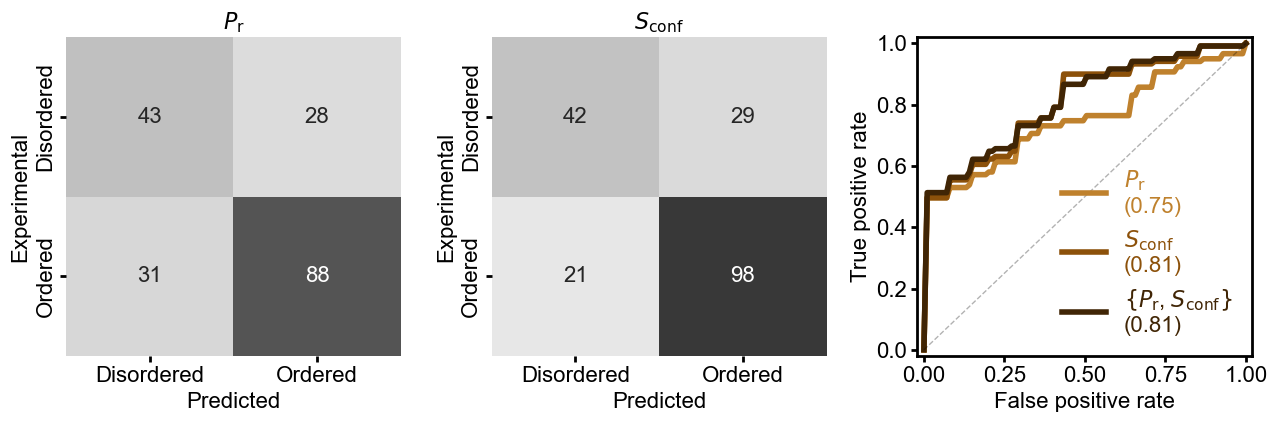

In [8]:
fig, axs = plt.subplot_mosaic(
    [['confusion_matrix_P', 'confusion_matrix_S', 'roc_auc']],
    figsize=(13, 4.5)
)

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_P'], perovskite_ordering_data[['m3gnet_rocksalt_prob']].to_numpy(), '$P_{\mathrm{r}}$')
plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_S'], perovskite_ordering_data[['m3gnet_normalized_conf_entropy']].to_numpy(), '$S_{\mathrm{conf}}$')

plot_roc_curve(
    perovskite_ordering_data, axs['roc_auc'], 
    [
        perovskite_ordering_data[['m3gnet_rocksalt_prob']].to_numpy(), 
        perovskite_ordering_data[['m3gnet_normalized_conf_entropy']].to_numpy(), 
        np.concatenate([
            perovskite_ordering_data[['m3gnet_rocksalt_prob']].to_numpy(), 
            perovskite_ordering_data[['m3gnet_normalized_conf_entropy']].to_numpy()
        ], axis=1)
    ],
    labels = ['$P_{\mathrm{r}}$', '$S_{\mathrm{conf}}$', '$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}\}$'],
    colors = ['#bf812d', '#8c510a', '#402505']
)

plt.tight_layout()
plt.savefig('../figures/m3gnet_classification.pdf', bbox_inches='tight')

# Fig. S2

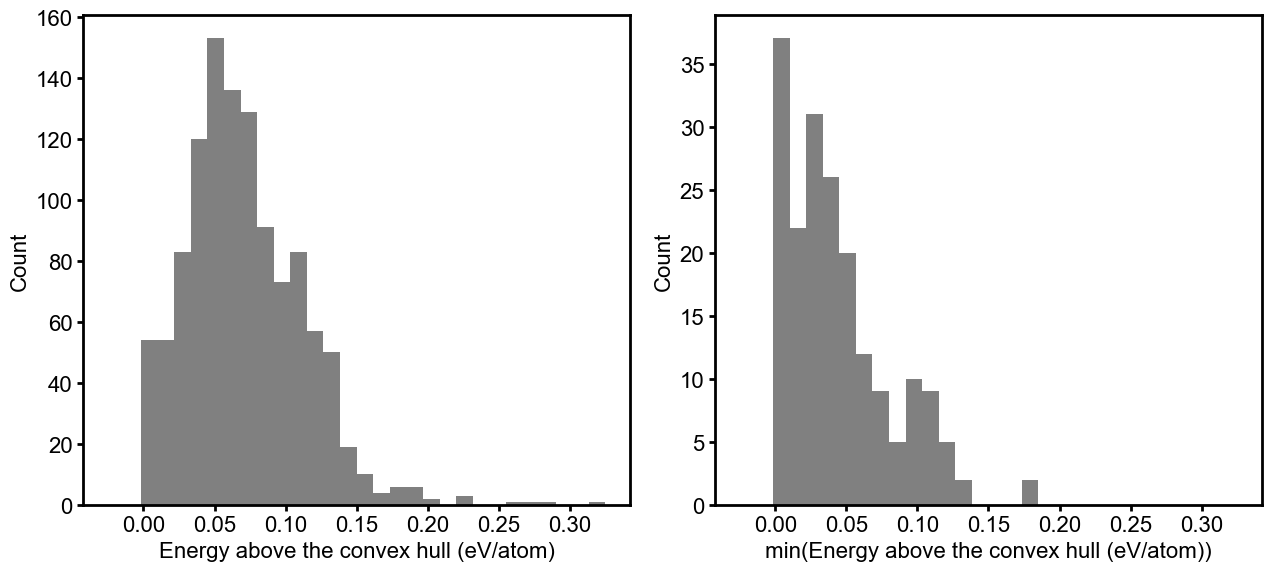

In [9]:
fig, axs = plt.subplot_mosaic(
    [['e_hull_hist_all', 'e_hull_hist_min']],
    figsize=(13, 6)
)

e_hull_hist_all = np.array([[np.nan if x == None else x for x in row] for row in perovskite_ordering_data['dft_e_hull'].tolist()])
ylabel = 'Count'
xlim = [-0.025, 0.325]
bins = 30

axs['e_hull_hist_all'].hist(e_hull_hist_all.flatten(), bins=bins, range=xlim, log=False, color='grey');
axs['e_hull_hist_all'].set(xlabel='Energy above the convex hull (eV/atom)', ylabel=ylabel);

axs['e_hull_hist_min'].hist(np.nanmin(e_hull_hist_all, axis=1), bins=bins, range=xlim, log=False, color='grey');
axs['e_hull_hist_min'].set(xlabel='min(Energy above the convex hull (eV/atom))', ylabel=ylabel);

plt.tight_layout()
plt.savefig('../figures/dft_e_hull_hist.pdf', bbox_inches='tight')

# Fig. S3

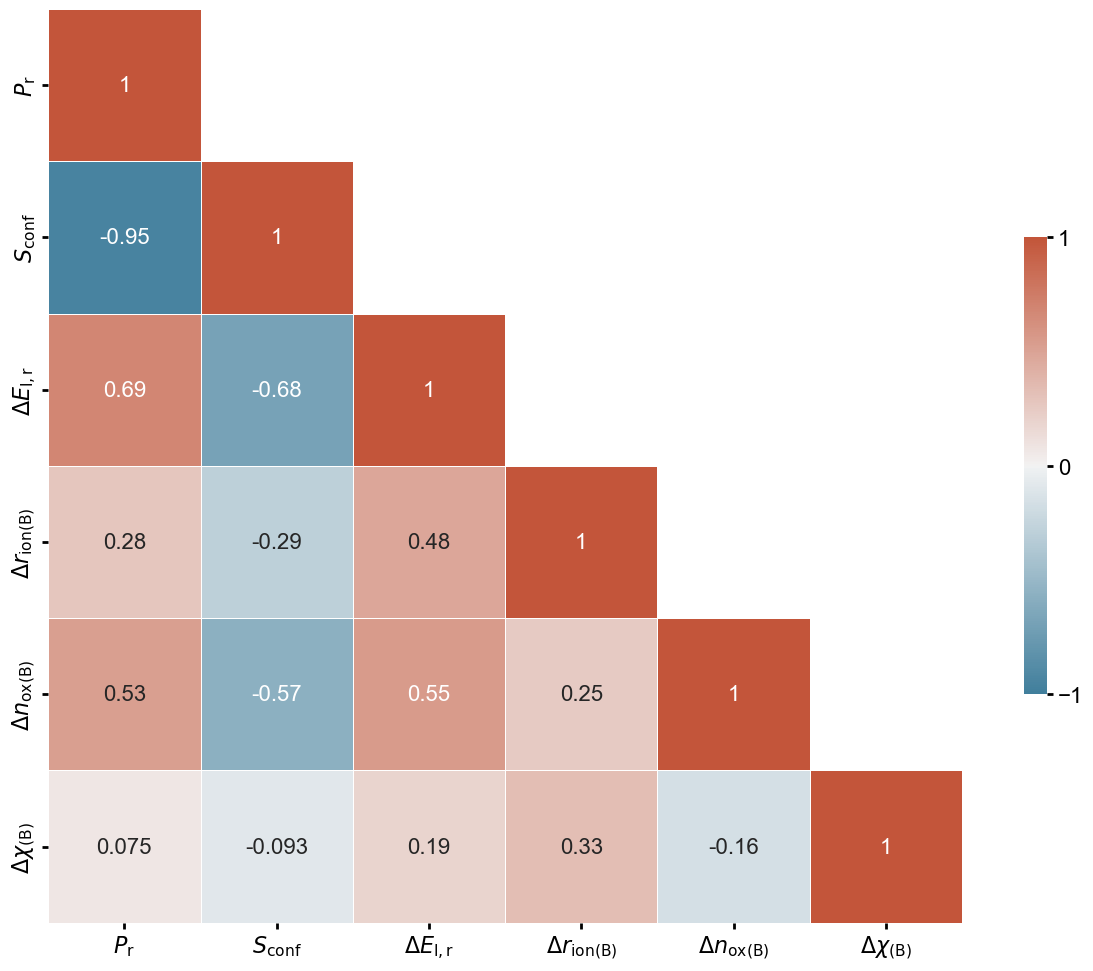

In [10]:
fig, ax = plt.subplots(figsize=(13, 10))

plot_correlation_matrix(perovskite_ordering_data, 'dft', None)

plt.tight_layout()
plt.savefig('../figures/dft_correlation_matrix.pdf', bbox_inches='tight')

# Fig. S4

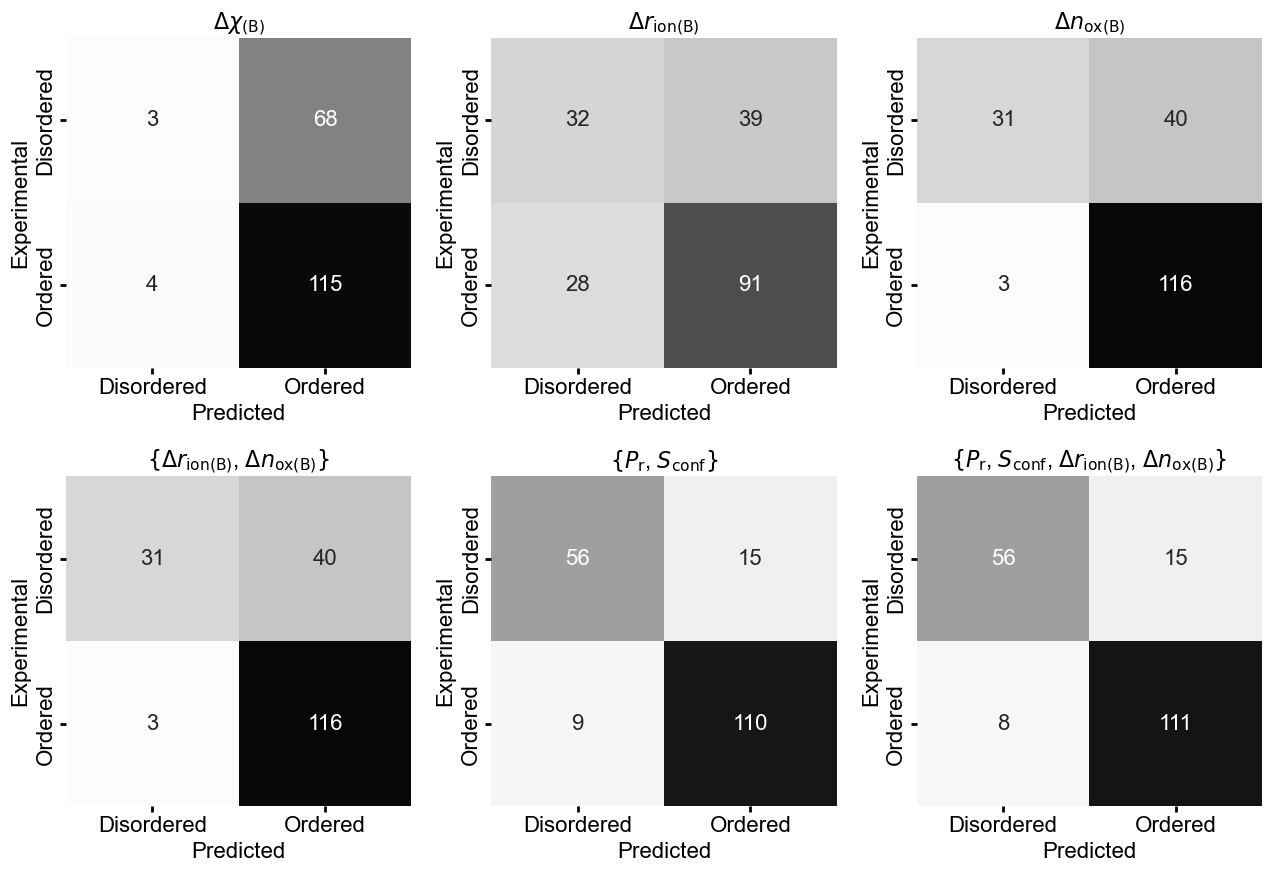

In [11]:
fig, axs = plt.subplot_mosaic(
    [['confusion_matrix_chi', 'confusion_matrix_r', 'confusion_matrix_n'], ['confusion_matrix_atomic', 'confusion_matrix_dft', 'confusion_matrix_dft_atomic']],
    figsize=(13, 9)
)

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_chi'], perovskite_ordering_data['B_electronegativity'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), '$\Delta \chi_{\mathrm{(B)}}$')
plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_r'], perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), '$\Delta r_{\mathrm{ion(B)}}$')
plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_n'], perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1), '$\Delta n_{\mathrm{ox(B)}}$')

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_atomic'], np.concatenate([
    perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1),
    perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
], axis=1), '$\{\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$')

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_dft'], np.concatenate([
    perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
    perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy()
], axis=1), '$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}\}$')

plot_confusion_matrix(perovskite_ordering_data, axs['confusion_matrix_dft_atomic'], np.concatenate([
    perovskite_ordering_data[['dft_rocksalt_prob']].to_numpy(), 
    perovskite_ordering_data[['dft_normalized_conf_entropy']].to_numpy(),
    perovskite_ordering_data['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1),
    perovskite_ordering_data['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
], axis=1), '$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}$, $\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$')


plt.tight_layout()
plt.savefig('../figures/additional_confusion_matrix.pdf', bbox_inches='tight')

# Fig. S5

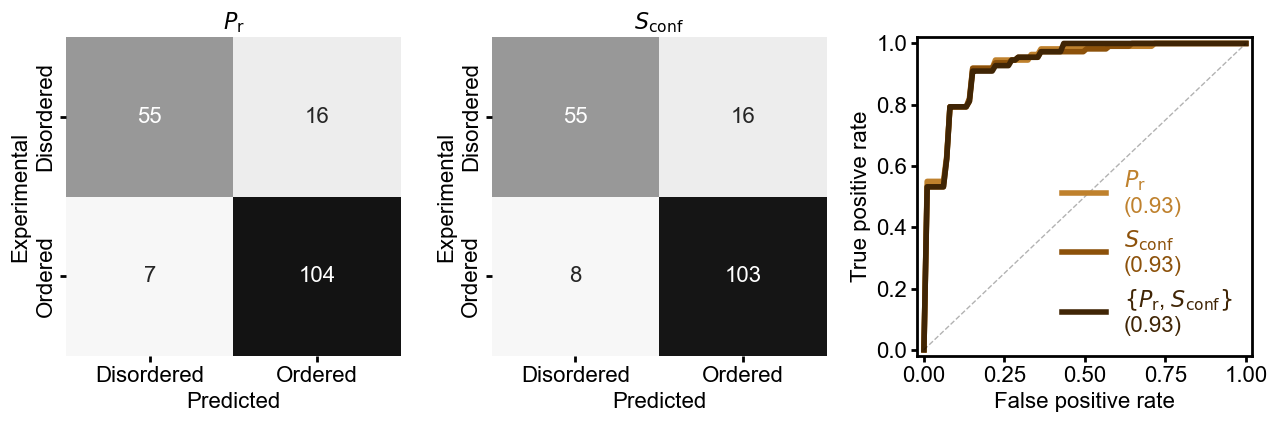

In [12]:
fig, axs = plt.subplot_mosaic(
    [['confusion_matrix_P', 'confusion_matrix_S', 'roc_auc']],
    figsize=(13, 4.5)
)

perovskite_ordering_data_filtered = perovskite_ordering_data.drop(perovskite_ordering_data[
    (perovskite_ordering_data['exp_ordering_parameter'] > 0) & 
    (perovskite_ordering_data['exp_ordering_parameter'] < 0.5)
].index)

plot_confusion_matrix(perovskite_ordering_data_filtered, axs['confusion_matrix_P'], perovskite_ordering_data_filtered[['dft_rocksalt_prob']].to_numpy(), '$P_{\mathrm{r}}$')
plot_confusion_matrix(perovskite_ordering_data_filtered, axs['confusion_matrix_S'], perovskite_ordering_data_filtered[['dft_normalized_conf_entropy']].to_numpy(), '$S_{\mathrm{conf}}$')

plot_roc_curve(
    perovskite_ordering_data_filtered, axs['roc_auc'], 
    [
        perovskite_ordering_data_filtered[['dft_rocksalt_prob']].to_numpy(), 
        perovskite_ordering_data_filtered[['dft_normalized_conf_entropy']].to_numpy(), 
        np.concatenate([
            perovskite_ordering_data_filtered[['dft_rocksalt_prob']].to_numpy(), 
            perovskite_ordering_data_filtered[['dft_normalized_conf_entropy']].to_numpy()
        ], axis=1)
    ],
    labels = ['$P_{\mathrm{r}}$', '$S_{\mathrm{conf}}$', '$\{P_{\mathrm{r}}$, $S_{\mathrm{conf}}\}$'],
    colors = ['#bf812d', '#8c510a', '#402505']
)

plt.tight_layout()
plt.savefig('../figures/filter_partial_dft_classification.pdf', bbox_inches='tight')

# Fig. S6

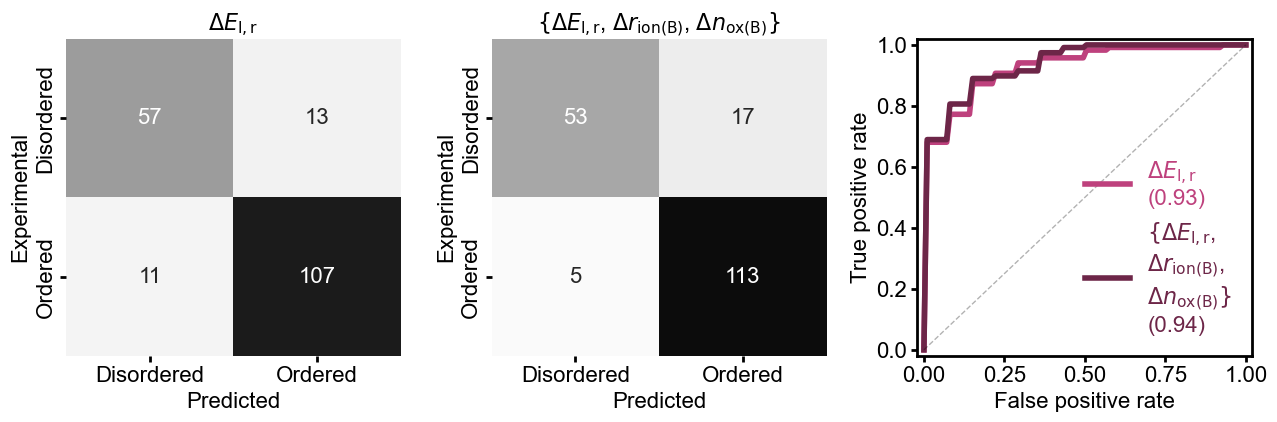

In [13]:
fig, axs = plt.subplot_mosaic(
    [['confusion_matrix_delE', 'confusion_matrix_delE_atomic', 'roc_auc']],
    figsize=(13, 4.5)
)

perovskite_ordering_data_filtered = perovskite_ordering_data[~perovskite_ordering_data['dft_rocksalt_layered_diff'].isna()]


plot_confusion_matrix(perovskite_ordering_data_filtered, axs['confusion_matrix_delE'], perovskite_ordering_data_filtered[['dft_rocksalt_layered_diff']].to_numpy(), '$\Delta E_{\mathrm{l,r}}$')

plot_confusion_matrix(
    perovskite_ordering_data_filtered, axs['confusion_matrix_delE_atomic'], 
    np.concatenate([
        perovskite_ordering_data_filtered[['dft_rocksalt_layered_diff']].to_numpy(),
        perovskite_ordering_data_filtered['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1),
        perovskite_ordering_data_filtered['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
    ], axis=1), '$\{\Delta E_{\mathrm{l,r}}$, $\Delta r_{\mathrm{ion(B)}}$, $\Delta n_{\mathrm{ox(B)}}\}$'
)

plot_roc_curve(
    perovskite_ordering_data_filtered, axs['roc_auc'], 
    [
        perovskite_ordering_data_filtered[['dft_rocksalt_layered_diff']].to_numpy(), 
        np.concatenate([
            perovskite_ordering_data_filtered[['dft_rocksalt_layered_diff']].to_numpy(),
            perovskite_ordering_data_filtered['B_ionic_radius'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1),
            perovskite_ordering_data_filtered['B_ox_state'].apply(lambda x: x['diff']).to_numpy().reshape(-1, 1)
        ], axis=1)
    ],
    labels = ['$\Delta E_{\mathrm{l,r}}$', '$\{\Delta E_{\mathrm{l,r}}$,\n$\Delta r_{\mathrm{ion(B)}}$,\n$\Delta n_{\mathrm{ox(B)}}\}$'],
    colors = ['#be417d', '#6d2648']
)

plt.tight_layout()
plt.savefig('../figures/dft_delE_classification.pdf', bbox_inches='tight')

# Fig. S7

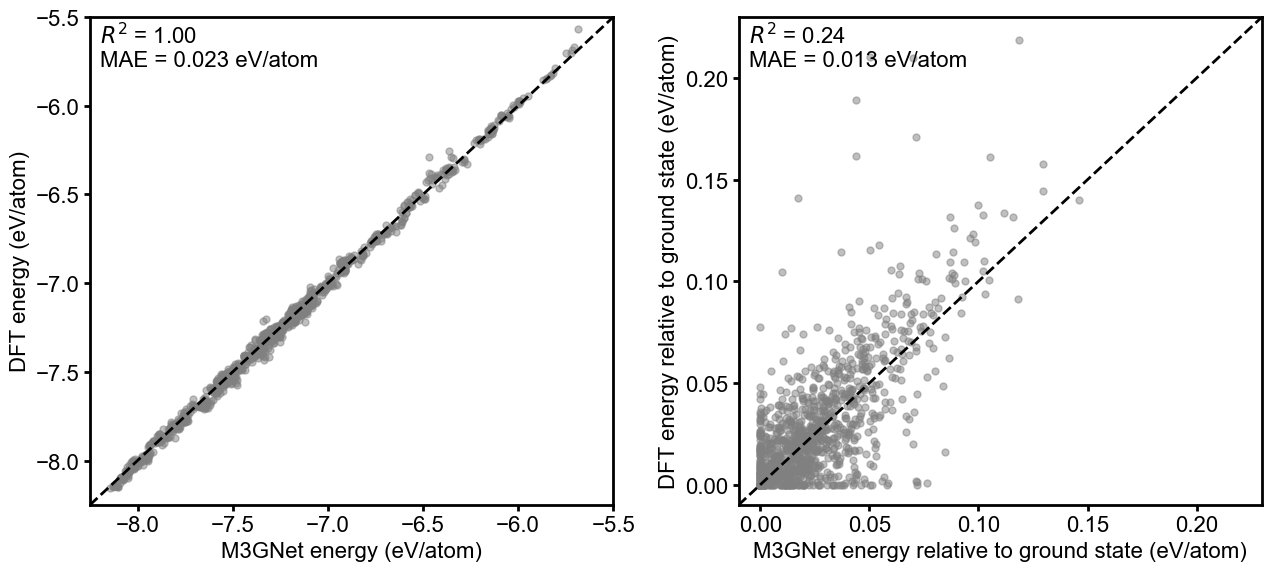

In [14]:
fig, axs = plt.subplot_mosaic(
    [['absolute', 'relative']],
    figsize=(13, 6)
)

m3gnet_energies_per_atom_absolute = [[np.nan if x == None else x for x in row] for row in perovskite_ordering_data['m3gnet_energy_per_atom'].tolist()]
dft_energies_per_atom_absolute = [[np.nan if x == None else x for x in row] for row in perovskite_ordering_data['dft_energy_per_atom'].tolist()]
X = np.array(m3gnet_energies_per_atom_absolute).flatten()
y = np.array(dft_energies_per_atom_absolute).flatten()

absolute_lim = [-8.25, -5.5]
axs['absolute'].plot(absolute_lim, absolute_lim, color='black', linestyle='--', linewidth=2)
axs['absolute'].set(xlabel='M3GNet energy (eV/atom)', ylabel='DFT energy (eV/atom)', xlim=absolute_lim, ylim=absolute_lim)
axs['absolute'].scatter(X, y, color='grey', s=25, alpha=0.5)
axs['absolute'].annotate('$R^2$ = {:.2f}\nMAE = {:.3f} eV/atom'.format(r2_score(X[~np.isnan(y)], y[~np.isnan(y)]), mean_absolute_error(X[~np.isnan(y)], y[~np.isnan(y)])), xy=(0.02, 0.90), xycoords='axes fraction', fontsize=16)

m3gnet_energies_per_atom_relative = [(row - np.nanmin(np.array(row))).tolist() for row in m3gnet_energies_per_atom_absolute]
dft_energies_per_atom_relative = [(row - np.nanmin(np.array(row))).tolist() for row in dft_energies_per_atom_absolute]
X = np.array(m3gnet_energies_per_atom_relative).flatten()
y = np.array(dft_energies_per_atom_relative).flatten()

relative_lim = [-0.01, 0.23]
axs['relative'].plot(relative_lim, relative_lim, color='black', linestyle='--', linewidth=2)
axs['relative'].set(xlabel='M3GNet energy relative to ground state (eV/atom)', ylabel='DFT energy relative to ground state (eV/atom)', xlim=relative_lim, ylim=relative_lim)
axs['relative'].scatter(X, y, color='grey', s=25, alpha=0.5)
axs['relative'].annotate('$R^2$ = {:.2f}\nMAE = {:.3f} eV/atom'.format(r2_score(X[~np.isnan(y)], y[~np.isnan(y)]), mean_absolute_error(X[~np.isnan(y)], y[~np.isnan(y)])), xy=(0.02, 0.90), xycoords='axes fraction', fontsize=16)

plt.tight_layout()
plt.savefig('../figures/m3gnet_dft_parity.pdf', bbox_inches='tight')

# Fig. S8

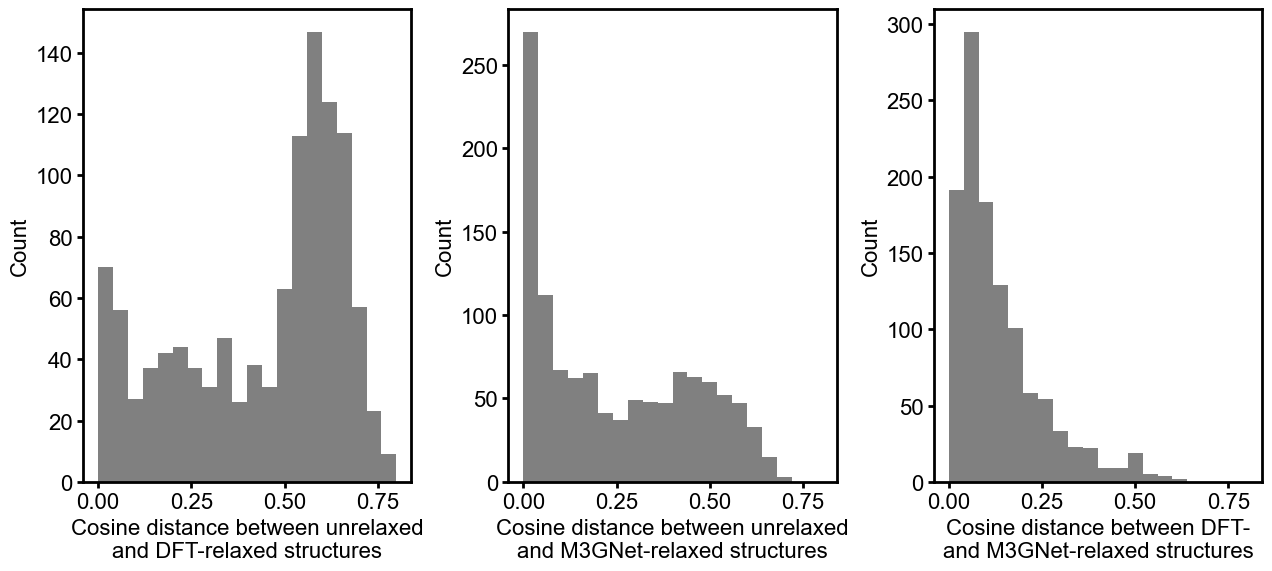

In [4]:
fig, axs = plt.subplot_mosaic(
    [['cosine_unrelaxed_dft', 'cosine_unrelaxed_m3gnet', 'cosine_dft_m3gnet']],
    figsize=(13, 6)
)

struct_fingerprints = {
    'cosine_unrelaxed_dft': [],
    'cosine_unrelaxed_m3gnet': [],
    'cosine_dft_m3gnet': []
}

for index, row in perovskite_ordering_data.iterrows():
    for i in range(6):
        if row['dft_opt_struct'][i] != None:
            struct_fingerprints['cosine_unrelaxed_dft'].append(cosine(row['unrelaxed_struct'][i]['struct_fingerprint'], row['dft_opt_struct'][i]['struct_fingerprint']))
            struct_fingerprints['cosine_unrelaxed_m3gnet'].append(cosine(row['unrelaxed_struct'][i]['struct_fingerprint'], row['m3gnet_opt_struct'][i]['struct_fingerprint']))
            struct_fingerprints['cosine_dft_m3gnet'].append(cosine(row['dft_opt_struct'][i]['struct_fingerprint'], row['m3gnet_opt_struct'][i]['struct_fingerprint']))

ylabel = 'Count'
bins = 20
xlim = [0.0, 0.8]

axs['cosine_unrelaxed_dft'].hist(struct_fingerprints['cosine_unrelaxed_dft'], bins=bins, range=xlim, log=False, color='grey');
axs['cosine_unrelaxed_dft'].set(xlabel='Cosine distance between unrelaxed\nand DFT-relaxed structures', ylabel=ylabel);

axs['cosine_unrelaxed_m3gnet'].hist(struct_fingerprints['cosine_unrelaxed_m3gnet'], bins=bins, range=xlim, log=False, color='grey');
axs['cosine_unrelaxed_m3gnet'].set(xlabel='Cosine distance between unrelaxed\nand M3GNet-relaxed structures', ylabel=ylabel);

axs['cosine_dft_m3gnet'].hist(struct_fingerprints['cosine_dft_m3gnet'], bins=bins, range=xlim, log=False, color='grey');
axs['cosine_dft_m3gnet'].set(xlabel='Cosine distance between DFT-\nand M3GNet-relaxed structures', ylabel=ylabel);

plt.tight_layout()
plt.savefig('../figures/struct_fingerprint.pdf', bbox_inches='tight')

# Figs. S9 and S10

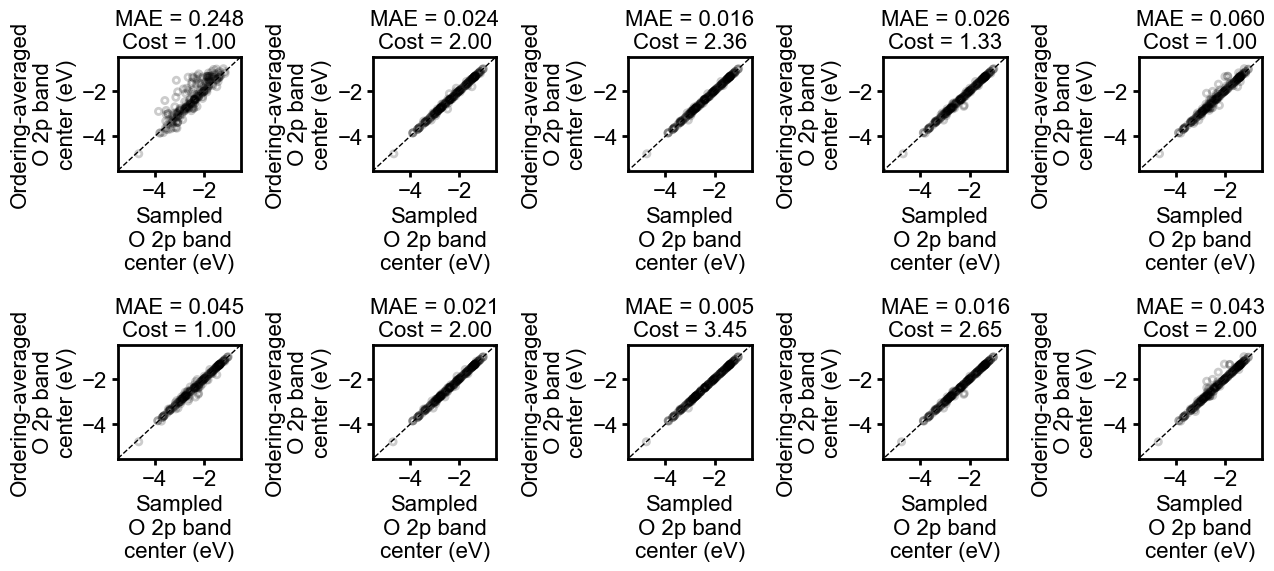

In [16]:
sampling_types = [
    ['random', 'rocksalt', 'rocksalt_random', 'rocksalt_layered'],
    ['dft_rocksalt_layered_random', 'dft_rocksalt_layered_all', 'm3gnet_rocksalt_random', 'm3gnet_rocksalt_all', 'm3gnet_lowest_1', 'm3gnet_lowest_2']
]

sampling_plot_arrangement = [
    ['random', 'rocksalt_random', 'dft_rocksalt_layered_random', 'm3gnet_rocksalt_random', 'm3gnet_lowest_1'],
    ['rocksalt', 'rocksalt_layered', 'dft_rocksalt_layered_all', 'm3gnet_rocksalt_all', 'm3gnet_lowest_2']
]

fig, axs = plt.subplot_mosaic(sampling_plot_arrangement, figsize=(13, 6))

perovskite_ordering_data_filtered = perovskite_ordering_data[~perovskite_ordering_data['dft_rocksalt_layered_diff'].isna()]
prop = 'dft_O_p_band_center'
axis_name = 'O 2p band\ncenter (eV)'
axis_lim = [-5.5, -0.5]

plot_sampling_results(perovskite_ordering_data_filtered, sampling_types, prop, axs, axis_name, axis_lim)

plt.tight_layout()
plt.savefig('../figures/sampling_' + prop + '.pdf', bbox_inches='tight')

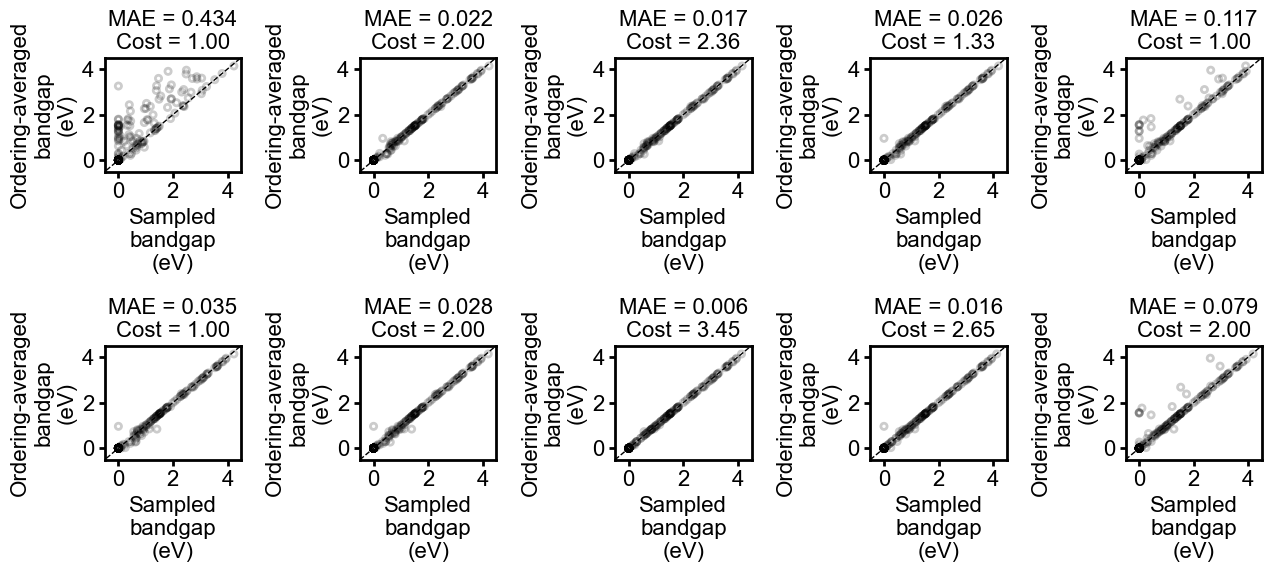

In [17]:
sampling_types = [
    ['random', 'rocksalt', 'rocksalt_random', 'rocksalt_layered'],
    ['dft_rocksalt_layered_random', 'dft_rocksalt_layered_all', 'm3gnet_rocksalt_random', 'm3gnet_rocksalt_all', 'm3gnet_lowest_1', 'm3gnet_lowest_2']
]

sampling_plot_arrangement = [
    ['random', 'rocksalt_random', 'dft_rocksalt_layered_random', 'm3gnet_rocksalt_random', 'm3gnet_lowest_1'],
    ['rocksalt', 'rocksalt_layered', 'dft_rocksalt_layered_all', 'm3gnet_rocksalt_all', 'm3gnet_lowest_2']
]

fig, axs = plt.subplot_mosaic(sampling_plot_arrangement, figsize=(13, 6))

perovskite_ordering_data_filtered = perovskite_ordering_data[~perovskite_ordering_data['dft_rocksalt_layered_diff'].isna()]
prop = 'dft_bandgap'
axis_name = 'bandgap\n(eV)'
axis_lim = [-0.5, 4.5]

plot_sampling_results(perovskite_ordering_data_filtered, sampling_types, prop, axs, axis_name, axis_lim)

plt.tight_layout()
plt.savefig('../figures/sampling_' + prop + '.pdf', bbox_inches='tight')